In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import scipy.special as sps

In [3]:
def read_data(well_name):
    df = pd.read_excel(
        'https://github.com/Firas-95/GEO572-Project-E.St.Louis/blob/class_example/yiquan/aqtest/ESL_aquifer_test_data.xlsx?raw=true',
        sheet_name = well_name)
    df.set_index(["time"], inplace=True)
    return df

In [4]:
df_chemico = read_data('Chemico_Metals')

## Jacob straight-line method
Use the Jacob straight-line method to determine the transmissivity (T) and storativity (S) from the aquifer test. The test well was pumped at a rate of 101.597 $ft^3/min$ (Q) and the drawdown was recorded in an observation well 250.0 feet (r) away from the test well. In the Jacob equations below, $t_0$ is the x-intercept of the best-fit straight line through the data and $\Delta(h_0-h)$ is the drawdown over one log cycle of time on the best-fit line (use Python to calculate both $t_0$ and $\Delta(h_0-h)$).  
![Jacob](https://share.cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/JacobStraightLine.PNG)

In [5]:
def log_line(x, a, b):
    return a + b * np.log10(x)


def jacob_straight(sitename, df, r, Q):
    dd = df['drawdown'][
        5:-5]  # The new dataset drops the first five and the last five numbers
    '''# curve_fit(user defined equation, x variable, y variable, convergence criteria)
    # para is an array with the first value being the y-intersect and the second value being the slope of the line
    # conv is the covariance of popt.'''
    para, conv = spo.curve_fit(log_line, dd.index, dd, p0=(1, 1))

    xx = [value for value in range(1, 121)]
    yy = log_line(xx, para[0], para[1])

    plt.semilogx(dd, 'o', xx, yy)
    plt.xlim([1, dd.index[-1]+10])
    plt.xlabel('Time (mins)')
    plt.ylabel('Drawdown (ft)')
    plt.title(sitename)
    a = para[0]
    b = para[1]
    xint = 10**(-a / b)
    T = 2.3 * Q / (4 * np.pi * (b))
    S = 2.25 * T * xint / r / r
    # do not print T or S beyond three sig figs
    print(
        'The Jacob Straight Line Method indicates that for ' +
        sitename + ', T is', round(T * 60 * 24, -1), 'ft^2/d and S is',
        round(S, 5), '.')
    return

The Jacob Straight Line Method indicates that for Chemico Metals, T is 48540.0 ft^2/d and S is 0.00056 .


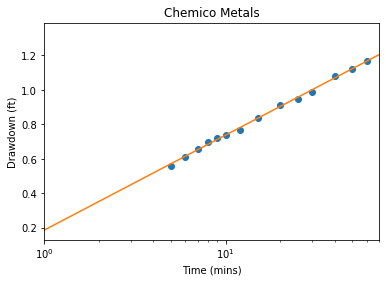

In [6]:
jacob_straight('Chemico Metals',df_chemico,250,101.597)

The Jacob Straight Line Method indicates that for Olin 3, T is 38460.0 ft^2/d and S is 0.00136 .


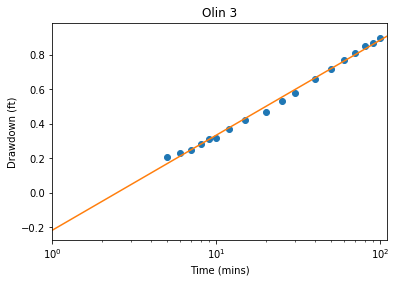

In [7]:
df_olin3 = read_data('Olin_3')
jacob_straight('Olin 3',df_olin3,330,80.4757)

The Jacob Straight Line Method indicates that for Olin 4, T is 47080.0 ft^2/d and S is 0.00175 .


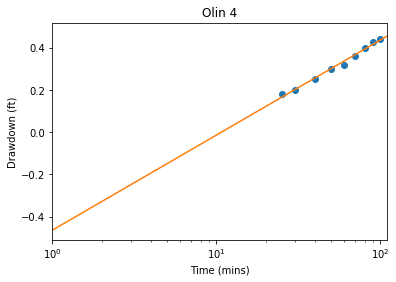

In [8]:
df_olin4 = read_data('Olin_4')
jacob_straight('Olin 4',df_olin4,670,80.4757)

The Jacob Straight Line Method indicates that for Olin 5, T is 93160.0 ft^2/d and S is 0.00174 .


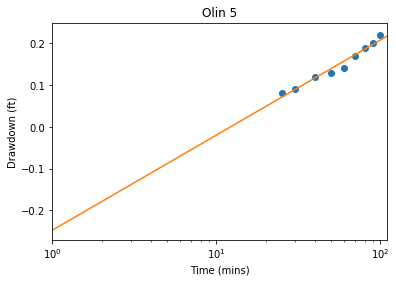

In [9]:
df_olin5 = read_data('Olin_5')
jacob_straight('Olin 5',df_olin5,1010,80.4757)